In [5]:
import geopandas as gpd

In [4]:

# Set filepath
#fp = "L2_data/.....shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

DriverError: L2_data/DAMSELFISH_distributions.shp: No such file or directory

In [6]:
from shapely.geometry import Point, Polygon

In [8]:
newdata= gpd.GeoDataFrame()

print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [9]:
newdata['geometry']= None

print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [10]:
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [11]:
newdata.loc[0, 'geometry']= poly

print(newdata)

                                            geometry
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


In [12]:
newdata.loc[0, 'location']= 'Senaatintori'

print(newdata)

                                            geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori


In [13]:
#.crs z座標系の宣言があるか確かめる
print(newdata.crs)

None


In [14]:
from fiona.crs import from_epsg 

newdata.crs= from_epsg(4326)#wgs84

print(newdata.crs)

{'init': 'epsg:4326', 'no_defs': True}


In [15]:

# Determine the output path for the Shapefile
outfp = "L2_data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

In [16]:
fp= "L2_data/Europe_borders.shp"
data= gpd.read_file(fp)

data.crs

{'init': 'epsg:4326'}

In [18]:
data.head()

TZID                                           geometry
0  Europe/Berlin  POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1  Europe/Berlin  POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2  Europe/Berlin  POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3  Europe/Berlin  POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4  Europe/Berlin  POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...

In [19]:
data["geometry"].head()

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

In [20]:
orig= data.copy()
#EPGS3035
data= data.to_crs(epsg=3035)

#Check the new geometry values
print(data['geometry'].head())

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry


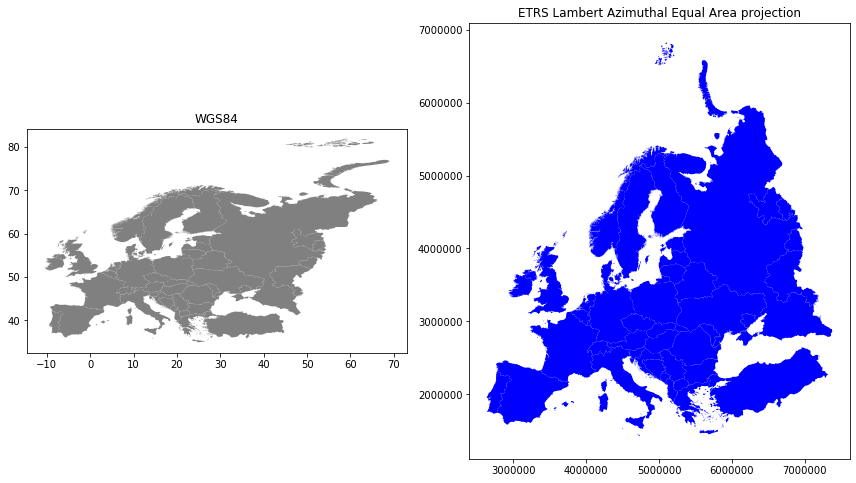

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [24]:
#output filepath 
outfpeurope_borders_aeqd = data.copy()
= "L2_data/Europe_borders_epsg3035.shp"

#save the disk
data.to_file(outfp)

In [57]:
europe_borders_aeqd = data.copy()

# Reproject to aeqd projection that we defined earlier
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd)

# Print
#print(europe_borders_aeqd.head(2))

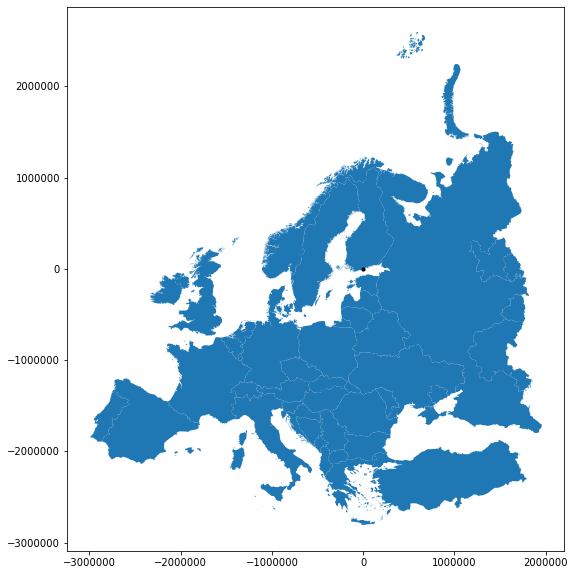

In [58]:
#ヘルシンキが中心の座標

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

# Plot the country borders
europe_borders_aeqd.plot(ax=ax)

# Plot the Helsinki point on top of the borders using the same axis
helsinki.plot(ax=ax, color='black', markersize=10)

In [25]:
#NOTICE: On Windows, the .prj -file might NOT update with the new CRS value when saving to Shapefile. 

In [26]:
#その時は以下の手法をとる。

In [32]:
import pycrs

# Define the crs for the GeoDataFrame as proj4-string
epsg_code = 3035
data.crs = pycrs.parse.from_epsg_code(epsg_code).to_proj4()

# Let's see what we have now
data.crs

'+proj=laea +ellps=GRS80 +a=6378137.0 +rf=298.257222101 +pm=0 +lon_0=10 +x_0=4321000 +y_0=3210000 +lat_0=52 +units=m +axis=enu +no_defs'

In [33]:

# Ouput filepath
outfp = "L2_data/Europe_borders_epsg3035.shp"

# Save to disk
data.to_file(outfp)


In [35]:
#他のEUとヘルシンキの中間地点を見つける

# Create the point representing Helsinki (in WGS84)
hki_lon = 24.9417
hki_lat = 60.1666

helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])

# Print
print(helsinki)

                    geometry
0  POINT (24.94170 60.16660)


In [60]:
import pyproj

# Define the projection using the coordinates of our Helsinki point (hki_lat, hki_lon) as the center point
# The .srs here returns the Proj4-string presentation of the projection
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=hki_lat, lon_0=hki_lon).srs

# Reproject to aeqd projection using Proj4-string
helsinki = helsinki.to_crs(crs=aeqd)

# Print the data
print(helsinki)

# Print the crs
print('\nCRS:\n', helsinki.crs)


                  geometry
0  POINT (0.00000 0.00000)

CRS:
 +units=m +proj=aeqd +ellps=WGS84 +datum=WGS84 +lat_0=60.1666 +lon_0=24.9417 


In [65]:

europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid
print(europe_borders_aeqd.head(2))

            TZID                                           geometry  \
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.802, -1058052.5...   
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....   

                            centroid  
0   POINT (-1057718.135 -492420.566)  
1  POINT (-1218235.217 -1242668.590)  


In [70]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    """
        
    dist=row[src_col].distance(dest_geom)#ユークリッド距離で算出
    
    dist_km= dist/1000
    
    row[target_col]= dist_km
    return row

In [71]:
helsinki_geom= helsinki.loc[0, 'geometry']

print(helsinki_geom)

POINT (0 0)


In [72]:
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, dest_geom=helsinki_geom, src_col='centroid', target_col='dist_to_Hki', axis=1)
print(europe_borders_aeqd.head(10))

            TZID                                           geometry  \
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.802, -1058052.5...   
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....   
2  Europe/Berlin  POLYGON ((-1194521.639 -571726.459, -1194674.9...   
3  Europe/Berlin  POLYGON ((-1185933.276 -571780.053, -1186040.7...   
4  Europe/Berlin  POLYGON ((-1182416.220 -569097.571, -1183274.4...   
5  Europe/Berlin  POLYGON ((-1172799.401 -565749.439, -1175327.7...   
6  Europe/Berlin  POLYGON ((-1162805.428 -563558.434, -1161240.8...   
7  Europe/Berlin  POLYGON ((-1129053.541 -568388.470, -1129252.5...   
8  Europe/Berlin  POLYGON ((-1109126.533 -570899.989, -1109690.5...   
9  Europe/Berlin  POLYGON ((-703490.147 -664009.792, -703842.631...   

                                        centroid  dist_to_Hki  
0   POINT (-1057718.135423444 -492420.565820501)  1166.724332  
1  POINT (-1218235.216971495 -1242668.589667923)  1740.207536  
2  POINT (-1194210.7892994

In [83]:
max_dist= max(europe_borders_aeqd['dist_to_Hki'])
mean_dist= europe_borders_aeqd['dist_to_Hki'].mean()

print("Maximum distance to Helsinki is %.2f km, and the mean distance is %.0f km" %(max_dist, mean_dist))

Maximum distance to Helsinki is 3470.41 km, and the mean distance is 1177 km


In [78]:
mean_dist= europe_borders_aeqd['dist_to_Hki'].mean()

1176.9060238983284